In [ ]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is incompatible.


# Classify English Handwritten Characters through CNN

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('C:/Users/apu/Downloads/Input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Problem statement
The dataset contains 3410 images containing handwritten letters (0-9 numbers, a-z alphabets small and in caps)
The goal is to train the model to recognize and predict the characters efficiently and categorize between 62 unique characters

I'm trying the classification through CNN


**import the libraries**

In [ ]:
import pandas
import random
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.image as img
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'keras_preprocessing'

# Split the dataset
In this step, we'll split the data into 3 datasets - training set, validation test and test set
Out of total 3410 images, 2910 to training set, 490 added to validation set, 5 to test set
Removed the images added to validation, test set from training set to test its accuracy

In [ ]:
data_path = r"C:\Users\apu\Downloads\Input"

dataset = pandas.read_csv(data_path + '/english.csv')
rand = random.sample(range(len(dataset)), 500)
validation_set = pandas.DataFrame(dataset.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
dataset.drop(rand, inplace=True)

rand = random.sample(range(len(validation_set)), 12)
test_set = pandas.DataFrame(validation_set.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
validation_set.drop(rand, inplace=True)

print(test_set)

                 image label
0   Img/img040-030.png     d
1   Img/img017-030.png     G
2   Img/img022-012.png     L
3   Img/img023-038.png     M
4   Img/img021-012.png     K
5   Img/img019-031.png     I
6   Img/img018-053.png     H
7   Img/img053-048.png     q
8   Img/img035-016.png     Y
9   Img/img017-049.png     G
10  Img/img033-011.png     W
11  Img/img057-046.png     u


# Data preprocessing
Now that the data is split, lets start with preprocessing step

Load the images through **flow_from_dataframe** method
This method is convinient since the data file (english.csv) contains the image names along with the classification class details

In [ ]:
train_data_generator = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)
training_data_frame = train_data_generator.flow_from_dataframe(dataframe=dataset, directory=data_path, x_col='image', y_col='label',
                                                               target_size=(64, 64), class_mode='categorical')
validation_data_frame = data_generator.flow_from_dataframe(dataframe=validation_set, directory=data_path, x_col='image', y_col='label',
                                                           target_size=(64, 64), class_mode='categorical')
test_data_frame = data_generator.flow_from_dataframe(dataframe=test_set, directory=data_path, x_col='image', y_col='label',
                                                     target_size=(64, 64), class_mode='categorical', shuffle=False)

Found 2910 validated image filenames belonging to 62 classes.
Found 495 validated image filenames belonging to 62 classes.
Found 5 validated image filenames belonging to 4 classes.


# Building the CNN model
We are about to build CNN model using libraries provided through **TensorFlow**

Code block breakdown:
* Create Convolution layer: to read/process the image, one feature or one part at a time
* Create Pooling layer: used to reduce the spatial size of convolved image
* Create Flattening layer: used to flatten the result, whose output would be the input for the neural network

We can create multiple convolution and pooling layer depending upon the need/complexity of the dataset

In [ ]:
cnn = tf.keras.models.Sequential()

# add convolutional and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

# Building, compiling and training the neural network

From the above step we have received the flattened matrix of the images that we processed
We are going to feed it to our neural network and train it

In this section, created fully connected Neural network aka Dense network, chosen sigmoid function for activation type
In below the model will learn from the training set and predicts the data from validation set

The model accuracy improves as the epochs iteration progresses

In [ ]:
# add full connection, output layer
cnn.add(tf.keras.layers.Dense(units=600, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=62, activation='sigmoid'))

# compile cnn
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x=training_data_frame, validation_data=validation_data_frame, epochs=30)

91/91 [==============================] - 46s 487ms/step - loss: 3.7242 - accuracy: 0.1003 - val_loss: 2.5497 - val_accuracy: 0.3232


# Predicting the testset images

Since the model is trained, lets pass the testset images and see how well our model predicts
class_indices function gives us the neural network mapping for our 62 characters

The result image's name is the predicted character by our model

Prediction mapping:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}
1/1 [==============================] - 0s 162ms/step
Max index:  [12, 39, 2, 37, 2]


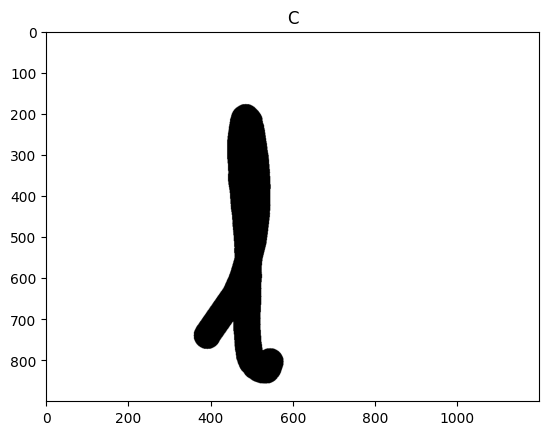

In [ ]:
print("Prediction mapping: ", training_data_frame.class_indices)
pred = cnn.predict(test_data_frame)

# switcher shows our network mapping to the prediction
switcher = {
            0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}

outputDf = pandas.DataFrame(pred)
maxIndex = list(outputDf.idxmax(axis=1))
print("Max index: ", maxIndex)
for i in range(len(test_set)):
    image = img.imread(data_path + '/' + test_set.at[i, 'image'])
    plt.title(switcher.get(maxIndex[i], "error"))
    plt.imshow(image)
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Function to convert labels to one-hot encoding
def convert_to_one_hot(labels, num_classes):
    one_hot_labels = np.zeros((len(labels), num_classes))
    for i in range(len(labels)):
        one_hot_labels[i, labels[i]] = 1
    return one_hot_labels

# Convert labels to one-hot encoding for training and test sets
train_labels_one_hot = convert_to_one_hot(training_data_frame.classes, 62)
test_labels_one_hot = convert_to_one_hot(test_data_frame.classes, 62)

# Predict probabilities for the test set
test_pred_prob = cnn.predict(test_data_frame)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(62):
    fpr[i], tpr[i], _ = roc_curve(test_labels_one_hot[:, i], test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(62):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def convert_to_one_hot(labels, num_classes):
    one_hot_labels = np.zeros((len(labels), num_classes))
    for i in range(len(labels)):
        one_hot_labels[i, labels[i]] = 1
    return one_hot_labels

# Convert labels to one-hot encoding for training and test sets
train_labels_one_hot = convert_to_one_hot(training_data_frame.classes, 62)
test_labels_one_hot = convert_to_one_hot(test_data_frame.classes, 62)

# Predict probabilities for the test set
test_pred_prob = cnn.predict(test_data_frame)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))

for i in range(62):
    fpr[i], tpr[i], _ = roc_curve(test_labels_one_hot[:, i], test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend()
plt.show()
